In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import os
import warnings
import plotly.plotly as py
import plotly.tools as tls

os.getcwd()

'/Users/Jill/Documents/Web Analysis/CA1'

In [2]:
# set-up
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
plt.style.available
%matplotlib inline
%precision 2

'%.2f'

In [3]:
# load data
airport_raw = pd.read_csv('./web_analytics/graph-mining/data/airports.dat', names = ['AirportID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz', 'type', 'source'])
airport_raw.head()

,AirportID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
airport_raw.isnull().sum()

AirportID     0
Name          0
City         44
Country       0
IATA          2
ICAO          0
Latitude      0
Longitude     0
Altitude      0
Timezone      0
DST           0
Tz            0
type          0
source        0
dtype: int64

In [5]:
airports = airport_raw['Name'].groupby(airport_raw['Country']).count().sort_values(ascending=False)
airports = airports[:20]
airports.values

array([1435,  417,  296,  241,  238,  234,  214,  180,  162,  125,  125,
        119,   96,   94,   83,   82,   81,   77,   74,   72])

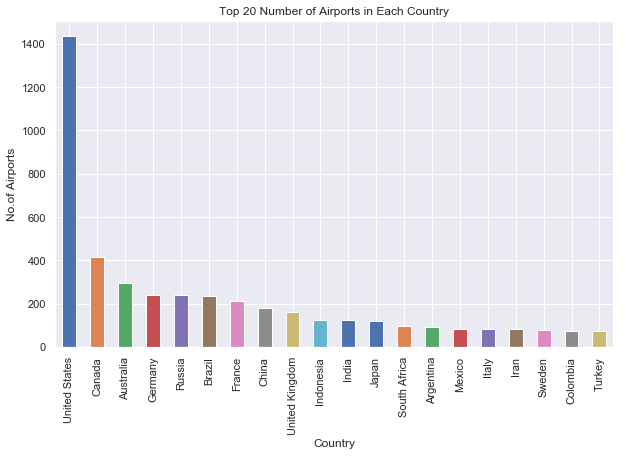

In [76]:
# Number of Airports in Each Country
plt.figure(figsize=(10, 6))
airports.plot.bar()
plt.title('Top 20 Number of Airports in Each Country')
plt.ylabel('No.of Airports')
plt.show()

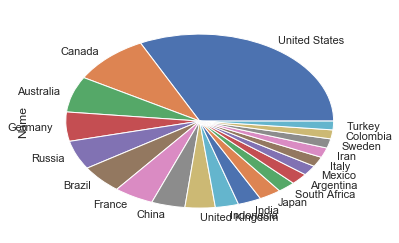

In [7]:
airports.plot.pie()

In [9]:
# load data
route_raw = pd.read_csv('./web_analytics/graph-mining/data/routes.csv')
route_raw.head()

,Airline,AirlineID,Source,SourceID,Target,TargetID,A,B,C
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [32]:
route_SIN = []
route_source_SIN = route_raw[route_raw['Source'] == 'SIN']['Source'].count()
route_target_SIN = route_raw[route_raw['Target'] == 'SIN']['Target'].count()
route_SIN.append(route_source_SIN)
route_SIN.append(route_target_SIN)
route_SIN

[408, 412]

In [33]:
route_LHR = []
route_source_LHR = route_raw[route_raw['Source'] == 'LHR']['Source'].count()
route_target_LHR = route_raw[route_raw['Target'] == 'LHR']['Target'].count()
route_LHR.append(route_source_LHR)
route_LHR.append(route_target_LHR)
route_LHR

[527, 524]

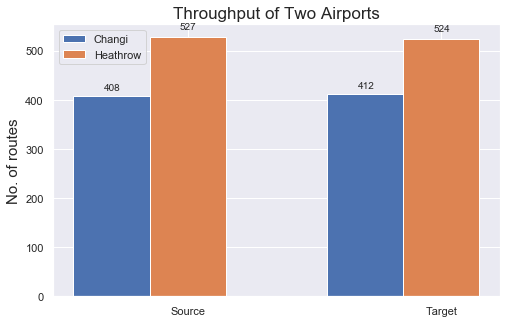

In [83]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.03, 1.03*height, '%d' % int(height))

plt.figure(figsize=(8, 5))
name = ['Source', 'Target']
total_width, n = 0.9, 3
width = total_width / n 
x = [0, 1]

a = plt.bar(x, route_SIN, label='Changi', width=width)
for i in range(len(x)):  
    x[i] = x[i] + width  
b = plt.bar(x, route_LHR, width=width,  label='Heathrow', tick_label = name)

autolabel(a)
autolabel(b)


plt.title('Throughput of Two Airports', fontsize = '17')
plt.ylabel('No. of routes', fontsize = '15')
plt.legend(loc='upper left')
plt.show()